# 决策树处理分类任务

1.	使用sklearn.tree.DecisionTreeClassifier完成Breast_Cancer_Wisconsin数据集预测问题
2.	计算最大深度为10时，十折交叉验证的精度(accuracy)，查准率(precision)，查全率(recall)，F1值
3.	绘制最大深度从1到10的决策树十折交叉验证精度的变化图

## 1. 读取数据

In [16]:
import numpy as np
import pandas as pd
data = pd.read_csv('data/Breast_Cancer_Wisconsin/data')
print(data.shape)

(569, 33)


In [17]:
data = data.values 
data_x = data[:,2:-1]
data_y = data[:,1:2]
data_y = np.reshape(data_y,(-1))


print(data_x.shape)
print(data_y.shape)

(569, 30)
(569,)


## 2. 导入模型

In [18]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

## 3. 训练与预测
计算最大深度为10的决策树，在使用数据data_x，标记data_y下，十折交叉验证的精度，查准率，查全率和F1值

In [19]:
label_encoder = LabelEncoder()
# data_y_encoded = label_encoder.fit_transform(data[:, 1:2])
data_y_encoded = label_encoder.fit_transform(data[:, 1:2].ravel())

model = DecisionTreeClassifier(max_depth = 10) # 参数max_depth决定了决策树的最大深度
# YOUR CODE HERE

# 使用十折交叉验证得到预测结果
predicted = cross_val_predict(model, data_x, data_y_encoded, cv=10)

# 计算精度
accuracy = accuracy_score(data_y_encoded, predicted)
print("精度 (Accuracy):", accuracy)

# 计算查准率
precision = precision_score(data_y_encoded, predicted)
print("查准率 (Precision):", precision)

# 计算查全率
recall = recall_score(data_y_encoded, predicted)
print("查全率 (Recall):", recall)

# 计算F1值
f1 = f1_score(data_y_encoded, predicted)
print("F1值:", f1)

精度 (Accuracy): 0.9068541300527241
查准率 (Precision): 0.8697674418604651
查全率 (Recall): 0.8820754716981132
F1值: 0.8758782201405152


###### 双击此处填写下面的表格

最大深度为10：  

精度 | 查准率 | 查全率 | F1
-|-|-|-
0.9086115992970123 | 0.8738317757009346 | 0.8820754716981132 | 0.8779342723004695

## 4. 改变最大深度，绘制决策树的精度变换图

绘制最大深度从1到10，决策树十折交叉验证精度的变化图

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
y = []

for i in range(1, 11):
    model = DecisionTreeClassifier(max_depth=i)  # 修正这一行，确保max_depth是大于等于1的整数
    prediction = np.mean(cross_val_score(model, data_x, data_y_encoded, cv=10, scoring='accuracy'))
    y.append(prediction)

x = np.linspace(1, 10, 10)
test = y                        # YOUR CODE


Text(0, 0.5, 'accuracy_score')

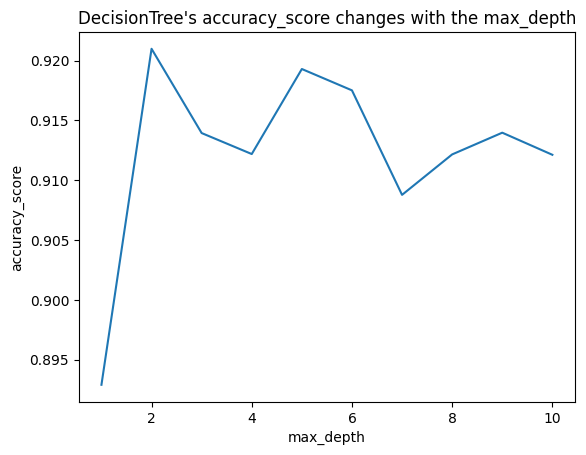

In [23]:
plt.figure()
plt.plot(x,test,'-')
plt.title("DecisionTree's accuracy_score changes with the max_depth")
plt.xlabel("max_depth")    
plt.ylabel("accuracy_score")

# 5. （选做）通过调整参数，得到一个泛化能力最好的模型

查看决策树文档，通过调整决策树的参数，得到一个最好的模型  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier  
并在下方给出参数的设定与其泛化性能指标

**（选做仅供参考）**

使用的GridSearchCV，它存在的意义就是自动调参，只要把参数输进去，就能给出最优化的结果和参数。
但是这个方法适合于小数据集，一旦数据的量级上去了，很难得出结果。

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
modelfit = DecisionTreeClassifier(max_depth = 10)
param_grid = {'criterion':['gini','entropy'],'max_depth':[10,11,12],
                  'min_samples_leaf':[1,2,3,4,5],'max_features':[1,2,3,4,5],'min_samples_split':[2,3,4,5]}

# YOUR CODE HERE

###### 双击此处填写参数设置与性能指标的结果

参数设置：  


性能指标得分：
精度: 
查准率: 
查全率: 
f1值: 